**Analyzing the trends of COVID-19 with Python**

**Project Statement:** Given data about COVID-19 patients, write code to visualize the impact and analyze the trends of rate of infection and recovery as well as make predictions about the number of cases expected a week future based on the current ternds.

**Guidance: **
*   Use pandas to accumulate.
*   Use plotly (visualization library) to create interative visualization.
*   Use Facebook library to make time series.
*   Visualize the prediction by combining these technologies.

**Importing Python Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

**Read the csv data**

In [4]:
data=pd.read_csv("/content/Covid-19 data (1).csv")

In [5]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,22-01-2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,22-01-2020,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,22-01-2020,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,22-01-2020,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,22-01-2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,27-07-2020,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,27-07-2020,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,27-07-2020,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,27-07-2020,7235,60,6028,1147,Europe


In [7]:
data.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat","Long":"long","Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered","Active":"active"},inplace=True)

In [8]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,22-01-2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,22-01-2020,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,22-01-2020,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,22-01-2020,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,22-01-2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,27-07-2020,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,27-07-2020,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,27-07-2020,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,27-07-2020,7235,60,6028,1147,Europe


In [9]:
data["active"]=data["confirmed"]-data["deaths"]-data["recovered"]

In [10]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,22-01-2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,22-01-2020,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,22-01-2020,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,22-01-2020,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,22-01-2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,27-07-2020,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,27-07-2020,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,27-07-2020,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,27-07-2020,7235,60,6028,1147,Europe


In [11]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,22-01-2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,22-01-2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,22-01-2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,22-01-2020,0,0,0,0,Africa


In [12]:
data.tail()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,27-07-2020,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,27-07-2020,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,27-07-2020,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,27-07-2020,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,27-07-2020,505,12,128,365,Africa


**TO FIND ALL THE CASES ON LAST VALUE IN DATE**



In [15]:
top=data[data["date"]==data["date"].max()]

In [16]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,22-01-2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,22-01-2020,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,22-01-2020,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,22-01-2020,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,22-01-2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,27-07-2020,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,27-07-2020,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,27-07-2020,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,27-07-2020,7235,60,6028,1147,Europe


In [17]:
w=top.groupby("country")["confirmed","active","deaths"].sum().reset_index()

<ipython-input-17-e35078e832a6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  w=top.groupby("country")["confirmed","active","deaths"].sum().reset_index()


In [18]:
w

,country,confirmed,active,deaths
0,Afghanistan,15205,13620,257
1,Albania,1137,232,33
2,Algeria,9394,2993,653
3,Andorra,764,19,51
4,Angola,86,64,4
...,...,...,...,...
182,West Bank and Gaza,448,73,3
183,Western Sahara,9,2,1
184,Yemen,323,229,80
185,Zambia,1057,271,7


**DATA VISUALIZATION**

In [26]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                range_color=[1,1500],color_continuous_scale="peach",title='Active Cases Country')
fig.show()

**PLOT FOR CONFIRMED CASES**

<ipython-input-30-b72be752fca0>:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



Text(0, 0.5, 'Cases total')

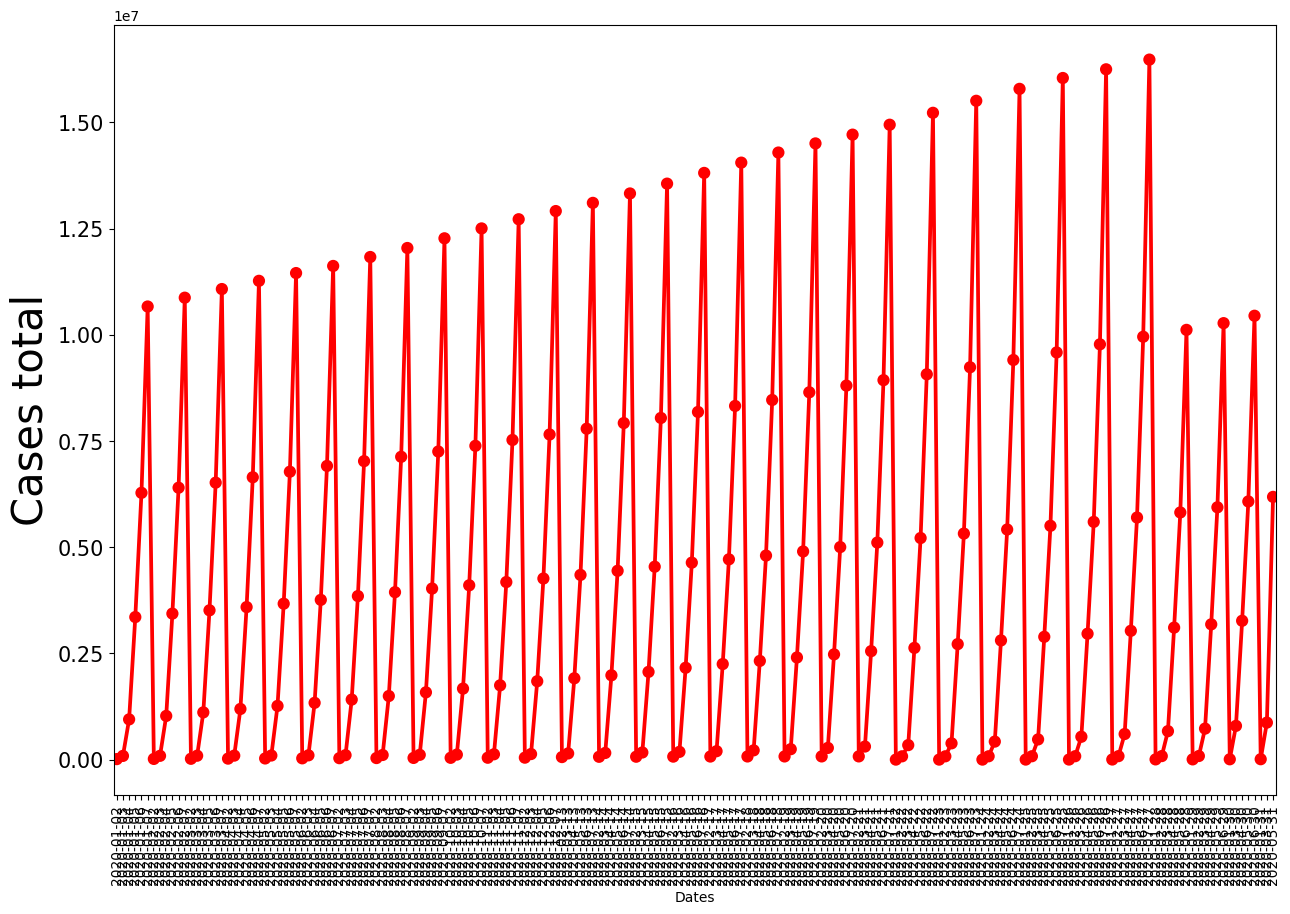

In [30]:
#plot for confirmes cases
plt.figure(figsize=(15,10))

#t_cases=data.groupby('date')['date','confirmed'].sum().reset_index()
t_Cases=data.groupby('date')['confirmed'].sum().reset_index()
t_Cases['date']=pd.to_datetime(t_Cases['date'])

a=sns.pointplot(x=t_Cases.date.dt.date,y=t_Cases.confirmed,color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)


In [32]:
t_Cases

,date,confirmed
0,2020-01-02,12038
1,2020-01-03,87690
2,2020-01-04,947569
3,2020-01-05,3355922
4,2020-01-06,6280725
...,...,...
183,2020-05-30,6077978
184,2020-06-30,10449697
185,2020-01-31,9927
186,2020-03-31,871355


**TOP 20 COUNTRIES HAVING MOST ACTIVE CASES**

In [33]:
t_actives=top.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()

In [34]:
t_actives

,country,active
0,US,1249002
1,Brazil,278980
2,Russia,229267
3,United Kingdom,217257
4,India,93349
5,Peru,92762
6,France,91731
7,Canada,85092
8,Chile,79769
9,Spain,61976


Text(0, 0.5, 'country')

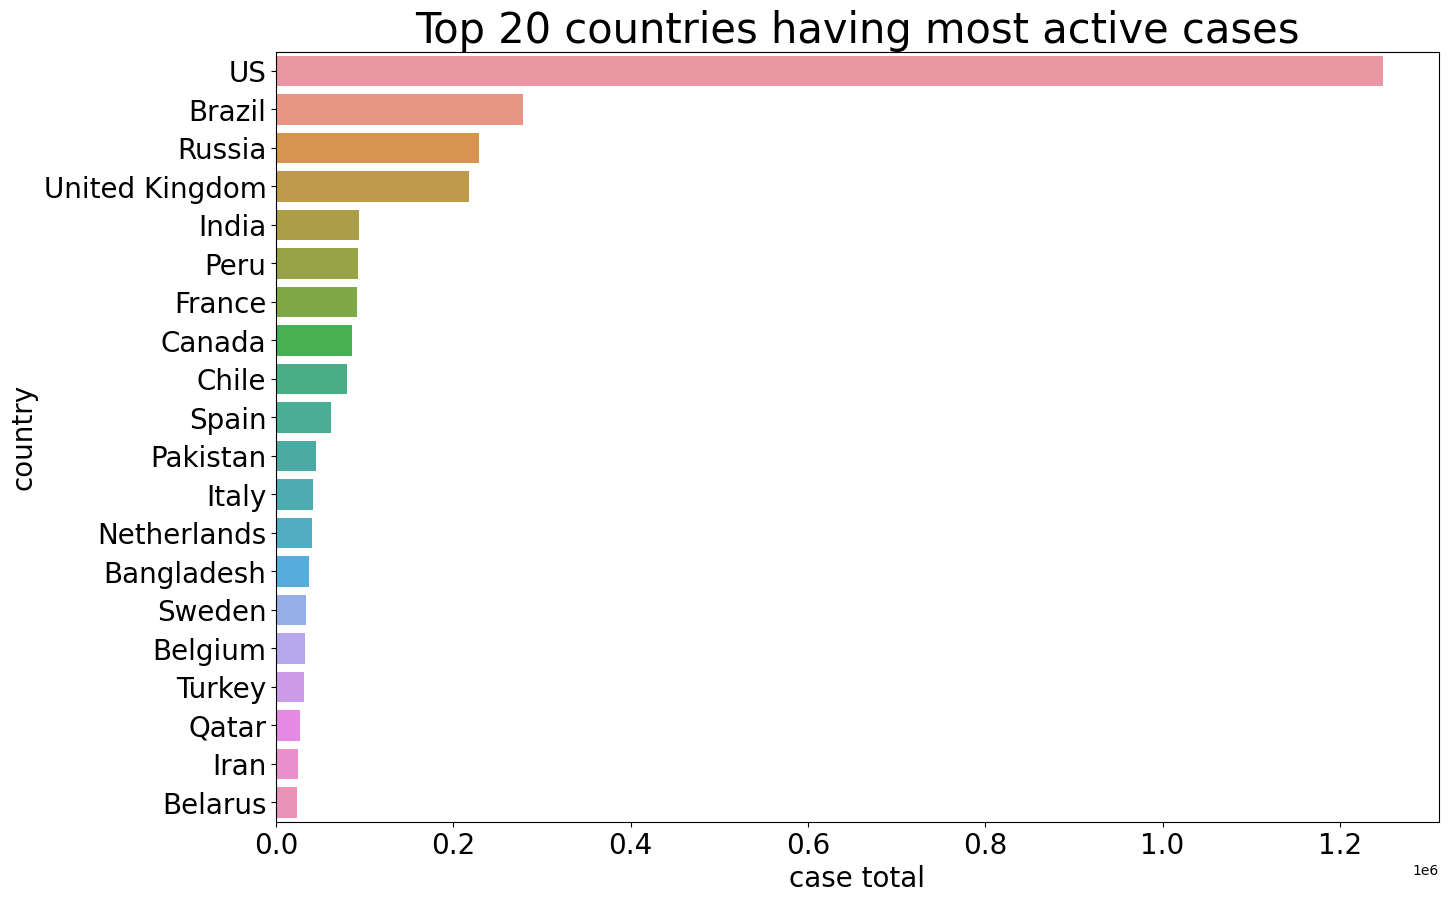

In [35]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30 )
a=sns.barplot(x=t_actives.active,y=t_actives.country)

#for i, (value,name)in enumerate (zip(t_actives.active,t_active.country)):
#a.text(value,i-.0.5,f'{value:,.0f}',size=10, ha='left',va='center)a.set(xlabel='cases total', ylabel='country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('case total', fontsize=20)
plt.ylabel('country',fontsize=20)

**TOP 20 COUNTRIES HAVING MOST DEATH CASES**

In [37]:
t_deaths=top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()

In [38]:
t_deaths

,country,deaths
0,US,105364
1,United Kingdom,39092
2,Italy,33415
3,Brazil,29314
4,France,28805
5,Spain,27127
6,Mexico,9930
7,Belgium,9467
8,Germany,8540
9,Iran,7797


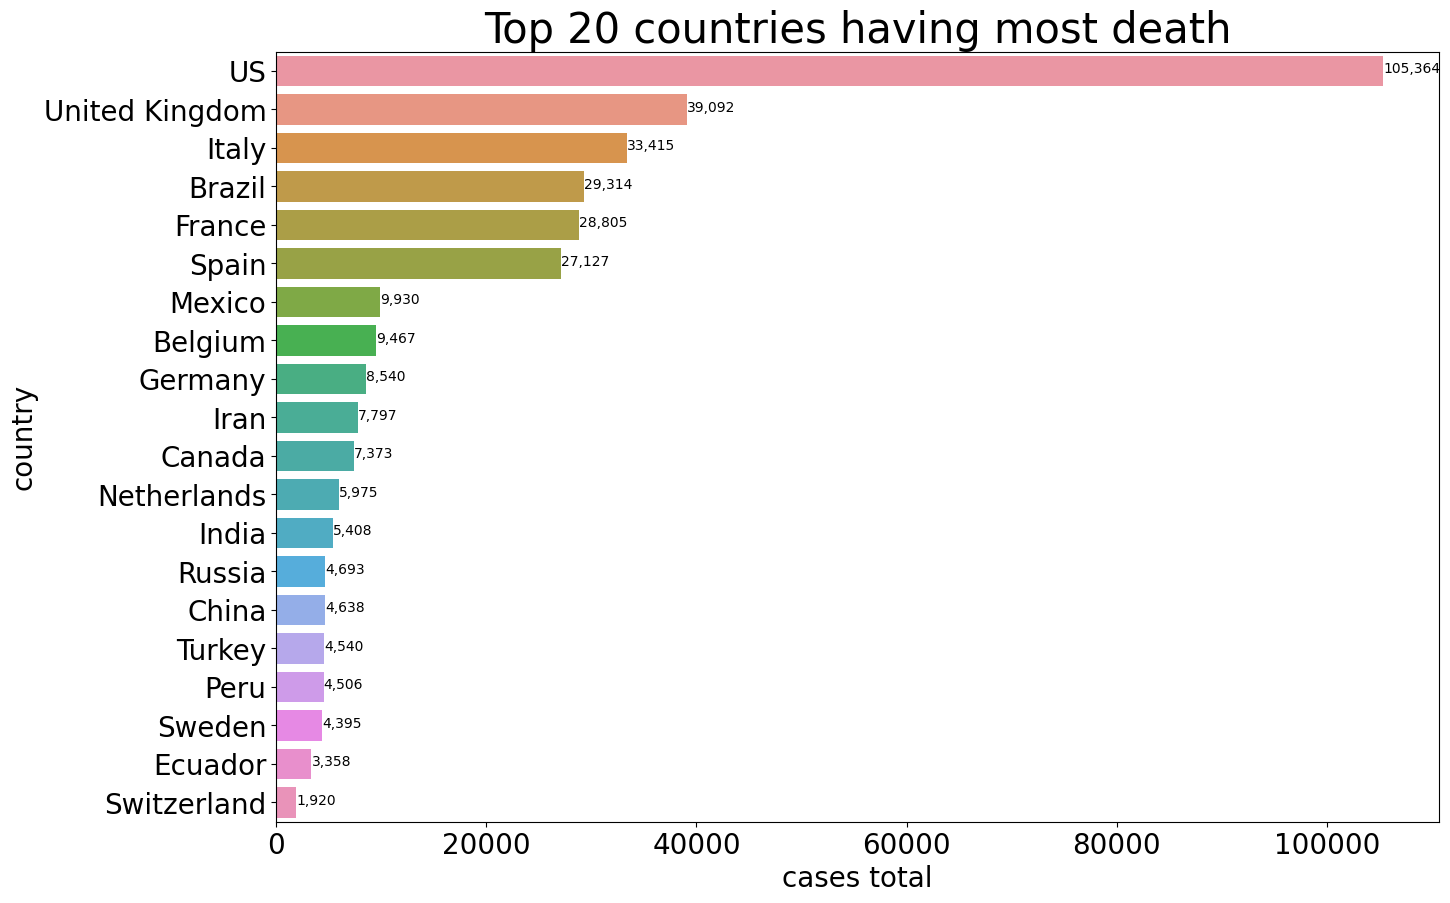

In [40]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most death', fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)
for i,(value, name) in enumerate (zip(t_deaths.deaths,t_deaths.country)):
  a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
  a.set(xlabel='cases total', ylabel='country')
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel('cases total',fontsize=20)
  plt.ylabel('country',fontsize=20)


**TOP 20 COUNTRIES HAVING MOST RECOVERED**

In [41]:
recover=top.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()

In [42]:
recover

,country,recovered
0,US,444758
1,Brazil,206555
2,Russia,171883
3,Germany,165352
4,Italy,157507
5,Spain,150376
6,Turkey,127973
7,Iran,118848
8,India,91852
9,China,77813


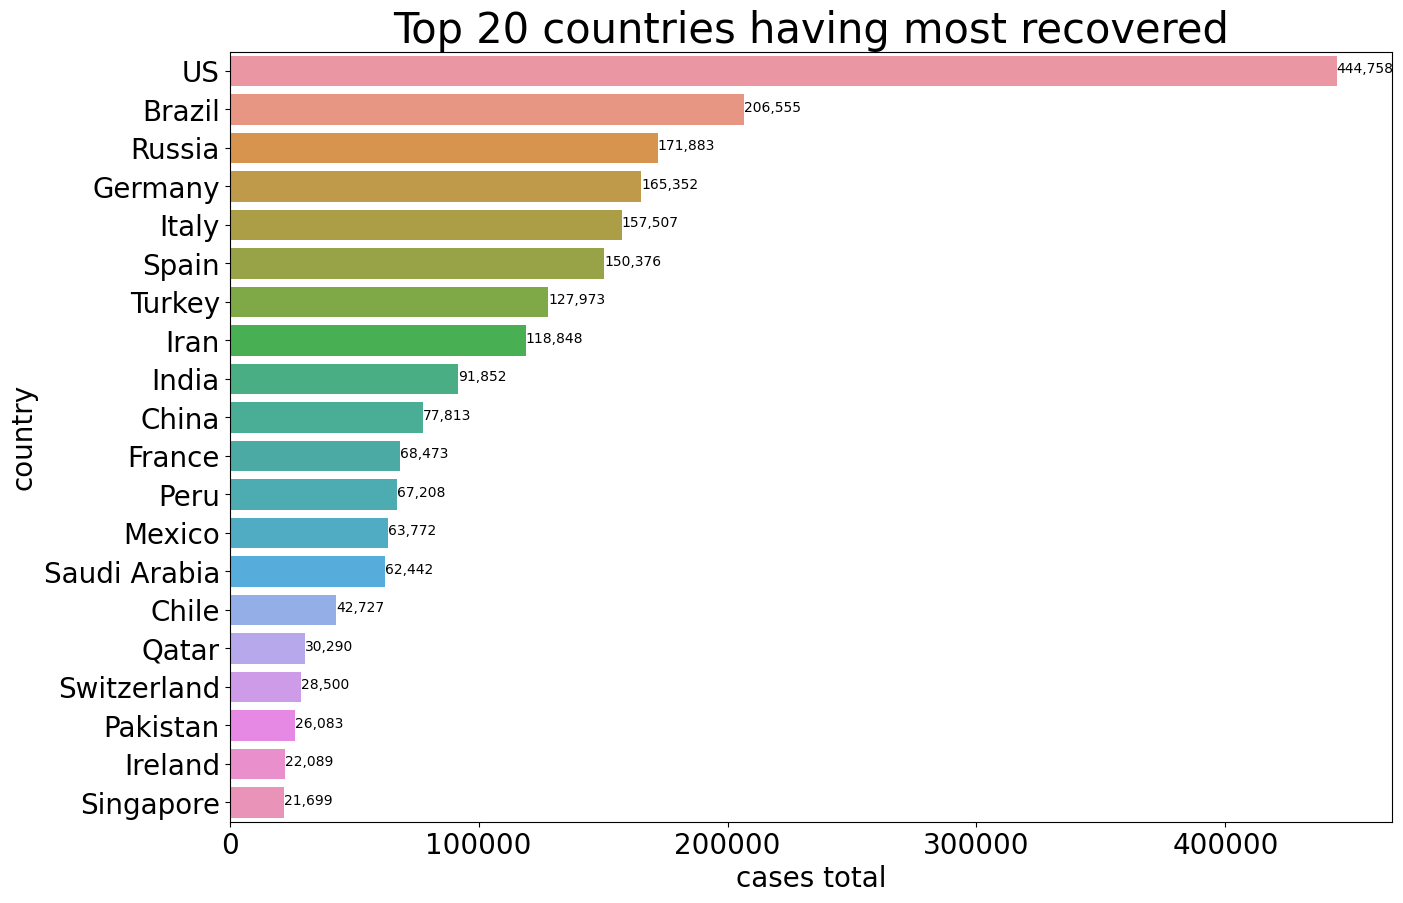

In [43]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most recovered', fontsize=30)
a=sns.barplot(x=recover.recovered,y=recover.country)
for i,(value, name) in enumerate (zip(recover.recovered,recover.country)):
  a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
  a.set(xlabel='cases total', ylabel='country')
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel('cases total',fontsize=20)
  plt.ylabel('country',fontsize=20)

**CASES OVER TIME IN TOP 4 COUNTRIES**

In [44]:
India=data[data.country=="India"]
India=India.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

<ipython-input-44-f4e05570d2a3>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [45]:
India

,date,recovered,deaths,confirmed,active
0,01-02-2020,0,0,1,1
1,01-03-2020,3,0,3,0
2,01-04-2020,148,58,1998,1792
3,01-05-2020,10007,1223,37257,26027
4,01-06-2020,95754,5608,198370,97008
...,...,...,...,...,...
183,30-05-2020,86936,5185,181827,89706
184,30-06-2020,347912,17400,585481,220169
185,31-01-2020,0,0,1,1
186,31-03-2020,123,35,1397,1239


In [46]:
Brazil=data[data.country=="Brazil"]
Brazil=Brazil.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

<ipython-input-46-833976a3f685>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [47]:
Brazil

,date,recovered,deaths,confirmed,active
0,01-02-2020,0,0,0,0
1,01-03-2020,0,0,2,2
2,01-04-2020,127,240,6836,6469
3,01-05-2020,38039,6412,92202,47751
4,01-06-2020,211080,29937,526447,285430
...,...,...,...,...,...
183,30-05-2020,200892,28834,498440,268714
184,30-06-2020,788318,59594,1402041,554129
185,31-01-2020,0,0,0,0
186,31-03-2020,127,201,5717,5389


In [55]:
US=data[data.country=="US"]
US=US.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

<ipython-input-55-5cb8fc8f7dbc>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [56]:
US

,date,recovered,deaths,confirmed,active
0,01-02-2020,0,0,8,8
1,01-03-2020,7,1,30,22
2,01-04-2020,8474,6846,214205,198885
3,01-05-2020,164015,66125,1106829,876689
4,01-06-2020,458231,106136,1816479,1252112
...,...,...,...,...,...
183,30-05-2020,416461,104778,1779214,1257975
184,30-06-2020,720631,127432,2636414,1788351
185,31-01-2020,0,0,7,7
186,31-03-2020,7024,5605,188724,176095


In [52]:
Russia=data[data.country=="Russia"]
Russia=Russia.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

<ipython-input-52-4eb3e0efff17>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [53]:
Russia

,date,recovered,deaths,confirmed,active
0,01-02-2020,0,0,2,2
1,01-03-2020,2,0,2,0
2,01-04-2020,190,24,2777,2563
3,01-05-2020,13220,1169,114431,100042
4,01-06-2020,175514,4849,414328,233965
...,...,...,...,...,...
183,30-05-2020,167469,4555,396575,224551
184,30-06-2020,411973,9306,646929,225650
185,31-01-2020,0,0,2,2
186,31-03-2020,121,17,2337,2199


**DATA VISUALIZATION**

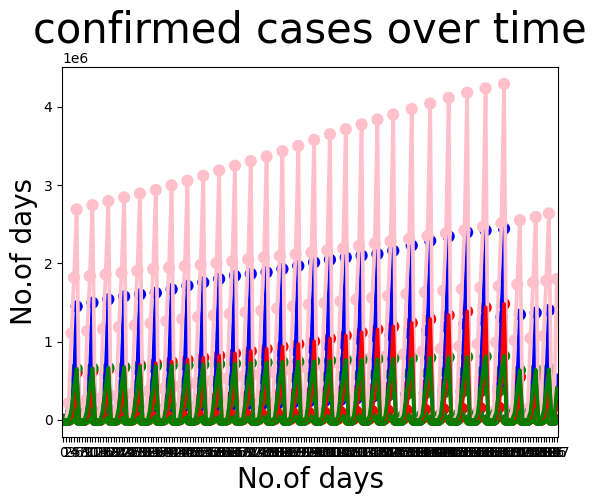

In [58]:
sns.pointplot(data=Brazil,x=Brazil.index,y='confirmed',color="Blue",label="Brazil")
sns.pointplot(data=US,x=US.index,y='confirmed',color="Pink",label="US")
sns.pointplot(data=India,x=India.index,y='confirmed',color="Red",label="India")
sns.pointplot(data=Russia,x=Russia.index,y='confirmed',color="Green",label="India")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('No.of days',fontsize=20)
plt.title('confirmed cases over time',fontsize=30)

#Adding a legend to distinguish the countries
plt.legend

plt.show()


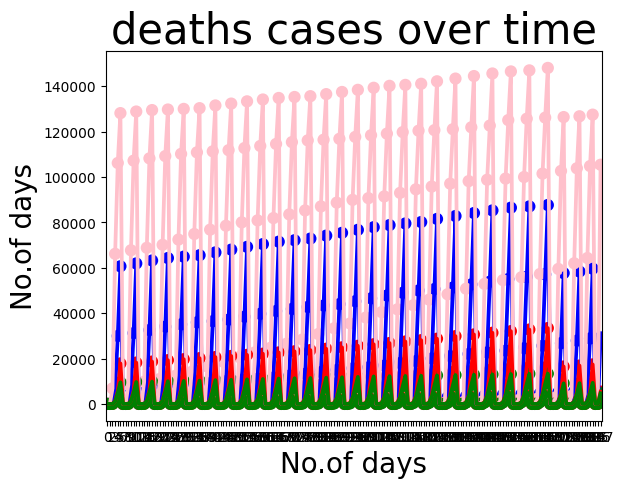

In [60]:
sns.pointplot(data=Brazil,x=Brazil.index,y='deaths',color="Blue",label="Brazil")
sns.pointplot(data=US,x=US.index,y='deaths',color="Pink",label="US")
sns.pointplot(data=India,x=India.index,y='deaths',color="Red",label="India")
sns.pointplot(data=Russia,x=Russia.index,y='deaths',color="Green",label="India")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('No.of days',fontsize=20)
plt.title('deaths cases over time',fontsize=30)

#Adding a legend to distinguish the countries
plt.legend

plt.show()

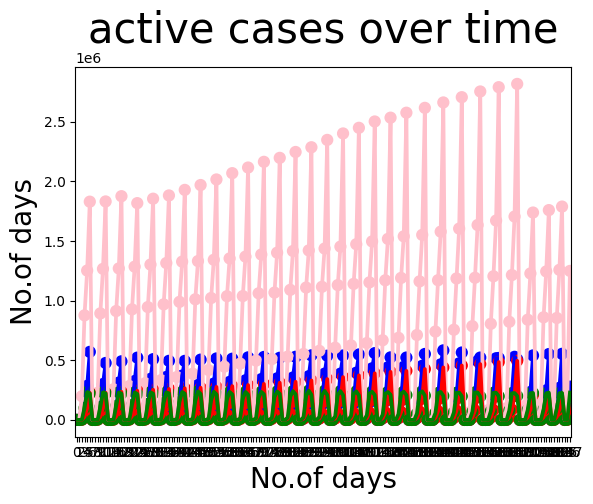

In [61]:
sns.pointplot(data=Brazil,x=Brazil.index,y='active',color="Blue",label="Brazil")
sns.pointplot(data=US,x=US.index,y='active',color="Pink",label="US")
sns.pointplot(data=India,x=India.index,y='active',color="Red",label="India")
sns.pointplot(data=Russia,x=Russia.index,y='active',color="Green",label="India")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('No.of days',fontsize=20)
plt.title('active cases over time',fontsize=30)

#Adding a legend to distinguish the countries
plt.legend

plt.show()

**FORECASTING USING FBPROPHET**

In [62]:
pip install prophet

In [65]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,22-01-2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,22-01-2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,22-01-2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,22-01-2020,0,0,0,0,Africa


In [66]:
data.groupby("date").sum().head()

<ipython-input-66-371f1ba50e63>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,lat,long,confirmed,deaths,recovered,active
date,,,,,,
01-02-2020,5594.20365,6140.869714,12038,259,281,11498
01-03-2020,5594.20365,6140.869714,87690,2990,41208,43492
01-04-2020,5594.20365,6140.869714,947569,50029,189434,708106
01-05-2020,5594.20365,6140.869714,3355922,239881,1026501,2089540
01-06-2020,5594.20365,6140.869714,6280725,376674,2639599,3264452


In [67]:
total_active=data['active'].sum()
print('Total no.of active COVID-19 CASES:', total_active)

Total no.of active COVID-19 CASES: 396715350


In [69]:
total_deaths=data['deaths'].sum()
print('Total no.of deaths COVID-19 CASES:', total_deaths)


Total no.of active COVID-19 CASES: 43384903


In [70]:
total_confirmed=data['confirmed'].sum()
print('Total no.of confirmed COVID-19 CASES:', total_confirmed)


Total no.of confirmed COVID-19 CASES: 828508482


In [71]:
total_recovered=data['recovered'].sum()
print('Total no.of recovered COVID-19 CASES:', total_recovered)


Total no.of recovered COVID-19 CASES: 388408229
